<a href="https://colab.research.google.com/github/DOMINION-JOHN1/LSTM-Gold-Price-Prediction/blob/main/GoldPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import GridSearchCV
import yfinance as yf

In [32]:
import sys
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [33]:
stock_symbol = 'GC=F'
start_date = '1985-01-01'
end_date = '2023-12-17'

# Fetch historical data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [34]:
data=pd.DataFrame(data)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2023-12-11,2004.099976,2004.199951,1977.199951,1978.000000,1978.000000,651
2023-12-12,1984.199951,1994.199951,1977.800049,1977.800049,1977.800049,95
2023-12-13,1978.500000,2024.800049,1975.000000,1982.300049,1982.300049,2252


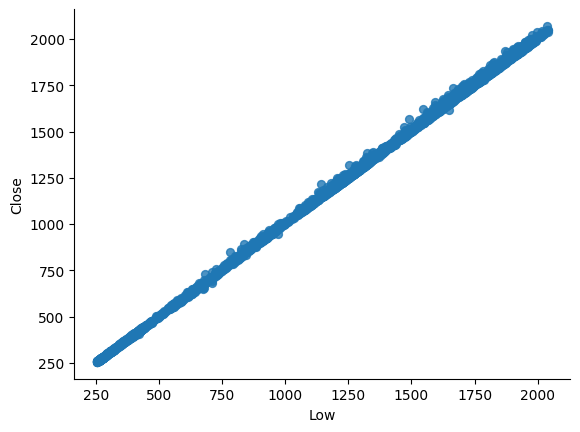

In [35]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
# Convert the "Date" column to a datetime object
data.index = pd.to_datetime(data.index)

# Create a new column for the month of the year (as numbers)
data['Month_Num'] = data.index.month

# Create a new column for the day of the week (as numbers, where Monday is 0 and Sunday is 6)
data['Day_of_Week_Num'] = data.index.dayofweek

# Display the DataFrame with the new columns
data

,Open,High,Low,Close,Adj Close,Volume,Month_Num,Day_of_Week_Num
Date,,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,8,2
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,8,3
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0,9,4
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2,9,1
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0,9,2
...,...,...,...,...,...,...,...,...
2023-12-11,2004.099976,2004.199951,1977.199951,1978.000000,1978.000000,651,12,0
2023-12-12,1984.199951,1994.199951,1977.800049,1977.800049,1977.800049,95,12,1
2023-12-13,1978.500000,2024.800049,1975.000000,1982.300049,1982.300049,2252,12,2


In [37]:
df = data.reset_index(drop=True).drop(columns=['Adj Close'])
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num
0,273.899994,273.899994,273.899994,273.899994,0,8,2
1,274.799988,278.299988,274.799988,278.299988,0,8,3
2,277.000000,277.000000,277.000000,277.000000,0,9,4
3,275.799988,275.799988,275.799988,275.799988,2,9,1
4,274.200012,274.200012,274.200012,274.200012,0,9,2
...,...,...,...,...,...,...,...
5841,2004.099976,2004.199951,1977.199951,1978.000000,651,12,0
5842,1984.199951,1994.199951,1977.800049,1977.800049,95,12,1
5843,1978.500000,2024.800049,1975.000000,1982.300049,2252,12,2
5844,2024.699951,2040.099976,2024.300049,2030.199951,236,12,3


In [38]:
df['Next Close'] = df['Close'].shift(-1)
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num,Next Close
0,273.899994,273.899994,273.899994,273.899994,0,8,2,278.299988
1,274.799988,278.299988,274.799988,278.299988,0,8,3,277.000000
2,277.000000,277.000000,277.000000,277.000000,0,9,4,275.799988
3,275.799988,275.799988,275.799988,275.799988,2,9,1,274.200012
4,274.200012,274.200012,274.200012,274.200012,0,9,2,274.000000
...,...,...,...,...,...,...,...,...
5841,2004.099976,2004.199951,1977.199951,1978.000000,651,12,0,1977.800049
5842,1984.199951,1994.199951,1977.800049,1977.800049,95,12,1,1982.300049
5843,1978.500000,2024.800049,1975.000000,1982.300049,2252,12,2,2030.199951
5844,2024.699951,2040.099976,2024.300049,2030.199951,236,12,3,2033.800049


In [39]:
 df.dropna(inplace=True)

In [40]:
x = df.drop(['Next Close'], axis=1)
y = df['Next Close']


In [41]:
scaler=StandardScaler()

In [42]:
X=scaler.fit_transform(x)

In [43]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Create a TimeSeriesSplit instance with 3 splits
tscv = TimeSeriesSplit(n_splits=6)

# Split the data
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    "Train:", X_train, y_train
    "Test:", X_test, y_test


In [44]:
X_train.shape

(5010, 7)

In [45]:
X_test.shape

(835, 7)

In [46]:

X_train_reshaped = X_train.reshape(X_train.shape[0], 1, 7)  # Assuming 7 input features


X_test_reshaped = X_test.reshape(X_test.shape[0], 1, 7)  # Assuming 7 input features

X_test_reshaped.shape



(835, 1, 7)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 7), activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))  # Output layer for regression

from sklearn.metrics import mean_absolute_error

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with the callback
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=15, validation_data=(X_test_reshaped, y_test), callbacks=[checkpoint])

# Evaluate the model and make predictions
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test loss: {loss}")

# Calculate Mean Absolute Error (MAE)
y_pred = model.predict(X_test_reshaped)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Alternatively, you can access the MAE from the training history
average_mae = np.mean(history.history['val_mae'])  # Use 'val_mae' for validation data
print(f"Average MAE: {average_mae}")


Epoch 1/100
331/334 [============================>.] - ETA: 0s - loss: 427359.3750 - mae: 482.4458
Epoch 1: val_loss improved from inf to 91837.40625, saving model to best_model.h5
334/334 [==============================] - 8s 13ms/step - loss: 423815.0625 - mae: 479.4514 - val_loss: 91837.4062 - val_mae: 264.8651
Epoch 2/100
 16/334 [>.............................] - ETA: 2s - loss: 28150.4043 - mae: 138.6582

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


334/334 [==============================] - ETA: 0s - loss: 16591.6465 - mae: 98.9998
Epoch 2: val_loss improved from 91837.40625 to 7037.05859, saving model to best_model.h5
334/334 [==============================] - 3s 9ms/step - loss: 16591.6465 - mae: 98.9998 - val_loss: 7037.0586 - val_mae: 60.9672
Epoch 3/100
328/334 [============================>.] - ETA: 0s - loss: 4299.0317 - mae: 48.5318
Epoch 3: val_loss improved from 7037.05859 to 4003.54907, saving model to best_model.h5
334/334 [==============================] - 3s 8ms/step - loss: 4271.1948 - mae: 48.3776 - val_loss: 4003.5491 - val_mae: 48.9095
Epoch 4/100
333/334 [============================>.] - ETA: 0s - loss: 1737.3229 - mae: 30.2483
Epoch 4: val_loss improved from 4003.54907 to 1622.53748, saving model to best_model.h5
334/334 [==============================] - 3s 8ms/step - loss: 1735.6587 - mae: 30.2445 - val_loss: 1622.5375 - val_mae: 31.7348
Epoch 5/100
333/334 [============================>.] - ETA: 0s - loss:

In [48]:
predictions= model.predict(X_test_reshaped)


27/27 [==============================] - 0s 3ms/step


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
mean_absolute_error(y_test[:-1], predictions[:-1])


15.195672124409848

In [51]:
mean_squared_error(y_test[:-1], predictions[:-1])

385.3408217413141

In [52]:
test= np.array([y_test])

In [53]:
pred=np.array(predictions)

In [54]:
y_test_1d = test.reshape(-1)

In [55]:
pred_1d = pred.reshape(-1)

In [56]:
new = pd.DataFrame({'True': y_test_1d, 'Prediction':pred_1d})
new['Date'] = np.arange(len(new))

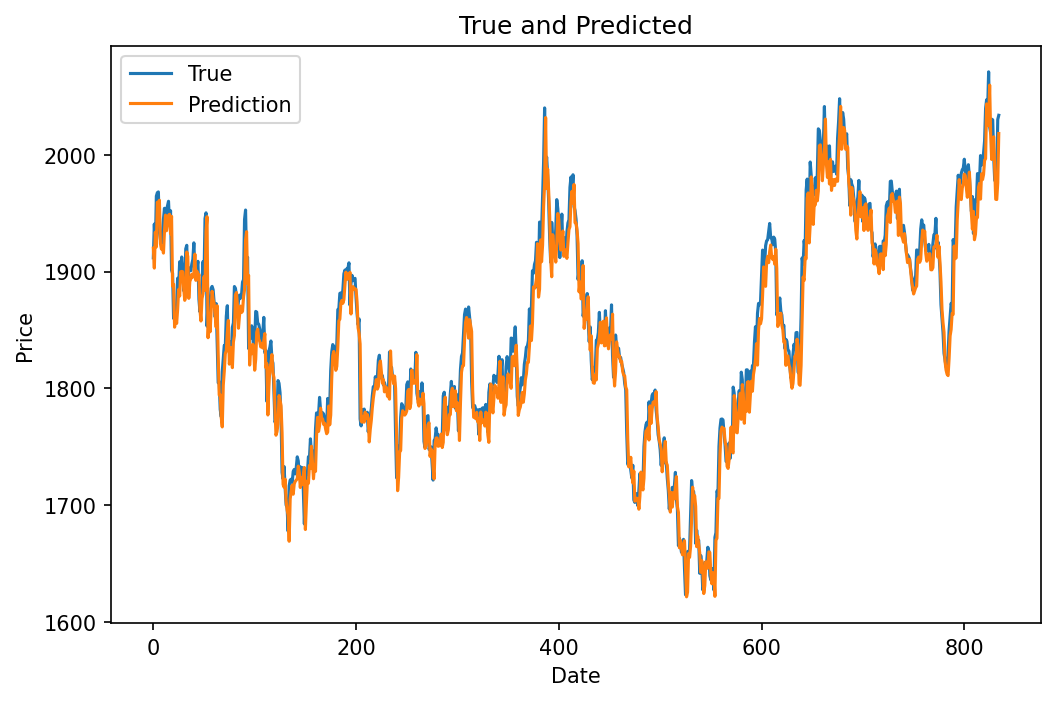

In [57]:
plt.figure(figsize=(8,5), dpi=150)
plt.plot(new['Date'], new['True'], label='True')
plt.plot(new['Date'], new['Prediction'], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('True and Predicted')
plt.legend()
